In [73]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns



In [74]:
df = pd.read_csv("../data/01_raw/synthetic_dataset.csv")

print(df.head())

   transaction_id     transaction_time  transaction_amount  sender_id  \
0               0  2025-10-18 23:08:13             1353.30  acc014958   
1               1  2025-10-30 17:48:28            30939.16  acc021462   
2               2  2025-10-30 20:43:28            26779.71  acc002326   
3               3  2025-11-16 12:08:19              257.73  acc035376   
4               4  2025-11-06 13:13:11             2465.48  acc039477   

  receiver_id transaction_type     transaction_city                  name  \
0   acc032333              pix    Silveira da Serra             Maya Dias   
1   acc002326              pix  Cirino dos Dourados         Larissa Nunes   
2   acc004656              pix            das Neves     Ravi Lucca Moraes   
3   acc038566              pix       Monteiro Verde        Rodrigo Moraes   
4   acc032716              pix               Guerra  Srta. Bella Nogueira   

              cpf  birth_date  ... device_model       receiver_name  \
0  630.172.984-69  1998-02-

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      100000 non-null  int64  
 1   transaction_time    100000 non-null  object 
 2   transaction_amount  100000 non-null  float64
 3   sender_id           100000 non-null  object 
 4   receiver_id         100000 non-null  object 
 5   transaction_type    100000 non-null  object 
 6   transaction_city    100000 non-null  object 
 7   name                100000 non-null  object 
 8   cpf                 100000 non-null  object 
 9   birth_date          100000 non-null  object 
 10  address_pcode       100000 non-null  object 
 11  phone_number        100000 non-null  object 
 12  acc_creation_date   100000 non-null  object 
 13  agency              100000 non-null  int64  
 14  account             100000 non-null  int64  
 15  credit_score        100000 non-null

In [76]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['birth_date'] = pd.to_datetime(df['birth_date'])

df['acc_creation_date'] = pd.to_datetime(df['acc_creation_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      100000 non-null  int64         
 1   transaction_time    100000 non-null  datetime64[ns]
 2   transaction_amount  100000 non-null  float64       
 3   sender_id           100000 non-null  object        
 4   receiver_id         100000 non-null  object        
 5   transaction_type    100000 non-null  object        
 6   transaction_city    100000 non-null  object        
 7   name                100000 non-null  object        
 8   cpf                 100000 non-null  object        
 9   birth_date          100000 non-null  datetime64[ns]
 10  address_pcode       100000 non-null  object        
 11  phone_number        100000 non-null  object        
 12  acc_creation_date   100000 non-null  datetime64[ns]
 13  agency              100000 non

In [77]:
df['sender_age'] = ((df['transaction_time'] - df['birth_date']).dt.days/365).astype(int)

df['transaction_hour'] = df['transaction_time'].dt.hour

df['large_amt'] = df['transaction_amount'] > 10000

df['acc_age_days'] = (df['transaction_time'] - df['acc_creation_date']).dt.days

print(df.head())

   transaction_id    transaction_time  transaction_amount  sender_id  \
0               0 2025-10-18 23:08:13             1353.30  acc014958   
1               1 2025-10-30 17:48:28            30939.16  acc021462   
2               2 2025-10-30 20:43:28            26779.71  acc002326   
3               3 2025-11-16 12:08:19              257.73  acc035376   
4               4 2025-11-06 13:13:11             2465.48  acc039477   

  receiver_id transaction_type     transaction_city                  name  \
0   acc032333              pix    Silveira da Serra             Maya Dias   
1   acc002326              pix  Cirino dos Dourados         Larissa Nunes   
2   acc004656              pix            das Neves     Ravi Lucca Moraes   
3   acc038566              pix       Monteiro Verde        Rodrigo Moraes   
4   acc032716              pix               Guerra  Srta. Bella Nogueira   

              cpf birth_date  ... receiver_account gender account_type  \
0  630.172.984-69 1998-02-08  

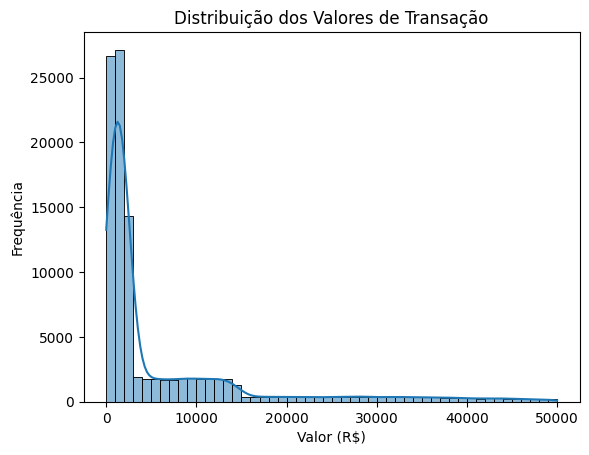

In [78]:
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Transação')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

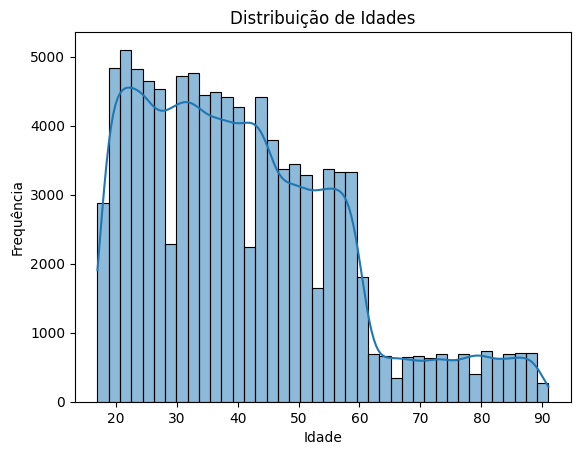

In [79]:
sns.histplot(df['sender_age'], bins=40, kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.show()

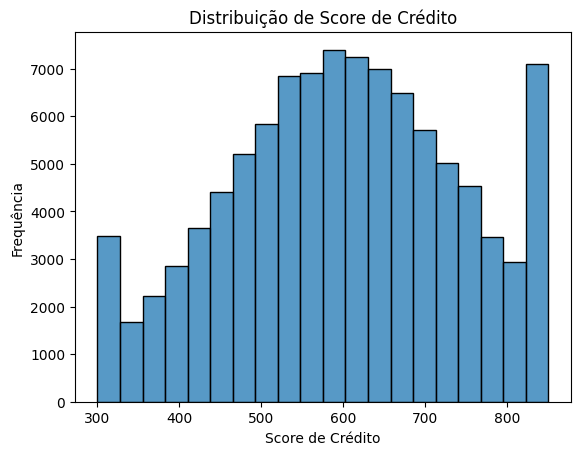

In [80]:
sns.histplot(df['credit_score'], bins=20)
plt.xlabel('Score de Crédito')
plt.ylabel('Frequência')
plt.title('Distribuição de Score de Crédito')
plt.show()

Análise de grafos

In [81]:
G = nx.from_pandas_edgelist(
    df,
    source='sender_id',    # Origem da seta
    target='receiver_id',   # Ponta da seta
    edge_attr=['transaction_amount', 'acc_age_days'],    # Dados para 'pendurar' na aresta
    create_using=nx.MultiDiGraph()       # Permite multiplas arestas entre os nós
)

In [82]:
total_received = df.groupby('receiver_id')['transaction_amount'].sum()
total_sent = df.groupby('sender_id')['transaction_amount'].sum()

In [83]:
in_degree = dict(G.in_degree())
sus_id = [node for node, degree in in_degree.items() if degree > 10]
print(f"{len(sus_id)} contas recebem de muita gente")

486 contas recebem de muita gente


In [84]:
for conta_id in sus_id:
    in_degree = G.in_degree(conta_id)

    out_degree = G.out_degree(conta_id)

    if in_degree >=10 and out_degree > 0 and out_degree <= 3:
        print(f"Conta {conta_id} recebe de {in_degree} contas e envia para apenas {out_degree} contas")

Conta acc004656 recebe de 23 contas e envia para apenas 1 contas
Conta acc043555 recebe de 31 contas e envia para apenas 2 contas
Conta acc010075 recebe de 24 contas e envia para apenas 2 contas
Conta acc026737 recebe de 22 contas e envia para apenas 1 contas
Conta acc032864 recebe de 17 contas e envia para apenas 1 contas
Conta acc012409 recebe de 18 contas e envia para apenas 1 contas
Conta acc022830 recebe de 20 contas e envia para apenas 3 contas
Conta acc024434 recebe de 18 contas e envia para apenas 2 contas
Conta acc039361 recebe de 23 contas e envia para apenas 2 contas
Conta acc007651 recebe de 18 contas e envia para apenas 2 contas
Conta acc028139 recebe de 25 contas e envia para apenas 1 contas
Conta acc023529 recebe de 19 contas e envia para apenas 1 contas
Conta acc038619 recebe de 17 contas e envia para apenas 3 contas
Conta acc034949 recebe de 24 contas e envia para apenas 3 contas
Conta acc028225 recebe de 19 contas e envia para apenas 1 contas
Conta acc035044 recebe de

In [85]:
metrics_list = []

for sus in sus_id:
    amt_in = total_received.get(sus, 0)
    amt_out = total_sent.get(sus, 0)

    if amt_in > 0:
        ratio = amt_out / amt_in

    else:
        ratio = 0

    if 0.8 <= ratio <= 1.05:
        metrics_list.append({
            'account_id': sus,
            'total_in': amt_in,
            'total_out': amt_out,
            'ratio': ratio,
            'type': 'Suspeita de Laranja'
        })
    elif ratio > 1.05:
        pass

suspects_df = pd.DataFrame(metrics_list)

if not suspects_df.empty:
    print(suspects_df.sort_values('ratio', ascending=False).head(10))

   account_id   total_in  total_out     ratio                 type
1   acc036814  218567.07  196569.90  0.899357  Suspeita de Laranja
12  acc011948  226679.10  199130.69  0.878470  Suspeita de Laranja
8   acc043129  158487.85  138689.95  0.875083  Suspeita de Laranja
19  acc027595  183522.89  160147.55  0.872630  Suspeita de Laranja
15  acc044931   76846.06   66862.64  0.870085  Suspeita de Laranja
21  acc037766   97032.23   84379.37  0.869601  Suspeita de Laranja
24  acc033662  223654.67  194343.24  0.868943  Suspeita de Laranja
14  acc036642  270322.79  233739.77  0.864669  Suspeita de Laranja
0   acc008466  345670.78  297962.07  0.861982  Suspeita de Laranja
7   acc002572  192746.69  166135.39  0.861936  Suspeita de Laranja


In [86]:
# Agrupando por conta para saber a 'velocidade' média do dinheiro
avg_in_time = df.groupby('receiver_id')['transaction_time'].mean()
avg_out_time = df.groupby('sender_id')['transaction_time'].mean()

# DataFrame auxiliar
time_features = pd.DataFrame(index=df['sender_id'].unique())
time_features.index.name = 'account_id'

# Calculando a diferença em HORAS
# avg_retention_hours negativo = enviou antes de receber (dinheiro parado/antigo)
# avg_retention_hours positivo e pequeno = o dinheiro 'queima' na mão.
time_features['avg_retention_hours'] = (avg_out_time - avg_in_time).dt.total_seconds() / 3600

# Preencher NaN quem só recebeu ou só enviou com um valor alto
time_features['avg_retention_hours'] = time_features['avg_retention_hours'].fillna(9999)

print(time_features.head())

            avg_retention_hours
account_id                     
acc014958            159.031944
acc021462           9999.000000
acc002326            -48.398333
acc035376           9999.000000
acc039477           1145.717014


In [87]:
# Criar DataFrame base com todos os nós

# Métricas de Grafos
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Métricas Financeiras
total_in = df.groupby('receiver_id')['transaction_amount'].sum()
total_out = df.groupby('sender_id')['transaction_amount'].sum()

# Montar o DataFrame Mestre com todos os nós
all_nodes = list(G.nodes())
metrics_df = pd.DataFrame(index=all_nodes)
metrics_df.index.name = 'account_id'

metrics_df['in_degree'] = metrics_df.index.map(in_degree).fillna(0)
metrics_df['out_degree'] = metrics_df.index.map(out_degree).fillna(0)
metrics_df['total_in'] = total_in
metrics_df['total_out'] = total_out

metrics_df = metrics_df.join(time_features['avg_retention_hours'])

# Calcular Ratio
metrics_df['ratio'] = metrics_df['total_out'] / (metrics_df['total_in'] + 0.01)

# Preencher vazios
metrics_df = metrics_df.fillna(0)

print(f"Dataset pronto para ML com {len(metrics_df)} contas.")

Dataset pronto para ML com 43938 contas.


In [88]:
# Definindo suspeitos
metrics_df['is_suspect'] = 0

suspect = (
    (metrics_df['in_degree'] > 5) &                   # Recebe de vários
    (metrics_df['ratio'].between(0.8, 1.05)) &        # Repassa quase tudo
    (metrics_df['avg_retention_hours'] < 12) &        # Repassa muito rápido (12h)
    (metrics_df['total_in'] > 10000)                  # Valores altos
)

metrics_df.loc[suspect, 'is_suspect'] = 1

print(metrics_df['is_suspect'].value_counts())

is_suspect
0    43567
1      371
Name: count, dtype: int64


In [89]:
print(metrics_df.head())

            in_degree  out_degree   total_in  total_out  avg_retention_hours  \
account_id                                                                     
acc014958           4           2   15828.16    2693.18           159.031944   
acc032333           2           2    3246.27    3525.78          -368.813750   
acc021462           0           2       0.00   31889.71          9999.000000   
acc002326           4           4   83173.59   72816.52           -48.398333   
acc004656          23           1  438247.08    1438.85          -908.078333   

               ratio  is_suspect  
account_id                        
acc014958   0.170151           0  
acc032333   1.086099           0  
acc021462   0.000000           0  
acc002326   0.875476           0  
acc004656   0.003283           0  


In [90]:
# Converte para um arquivo compacto que será usado na modelagem

metrics_df.to_parquet('../data/01_raw/metrics_df.parquet')